# LAI Prediction project notebook 1

This is the first notebook in the LAI prediction project. In this notebook we create a segmented image from one of the images of the dataset using the opencv library. This segmented image is black/white with the white being all the 'green' in the image and the black being the rest. With this segmented image it is possible to calculate the total 'green' area (pixels) and the center of mass for this area.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
from scipy import ndimage

In [2]:
# Save color space conventions into variable
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]

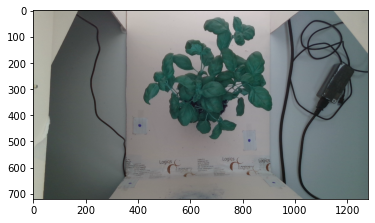

(720, 1280, 3)

In [3]:
# import image
Plant1_top = cv2.imread('../Images/Plant1_top_Color.png')
plt.imshow(Plant1_top)
plt.show()
Plant1_top.shape

The opencv library imports images with a different color space than rgb. Therefore to recreate the original image a transform is needed

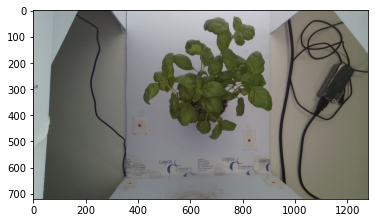

In [4]:
Plant1_top = cv2.cvtColor(Plant1_top, cv2.COLOR_BGR2RGB)
plt.imshow(Plant1_top)
plt.show()

The segmented image is created with a so called mask. This mask selects colors based on the hsv colorspace. Using plots of this spectrum we made an educated guess on what hsv values would capture all the green plant area's and discard all the background. With this mask the area and center of mass can be calculated

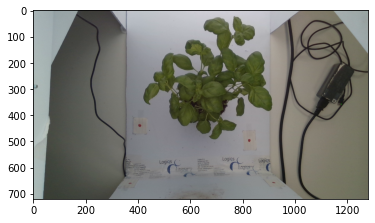

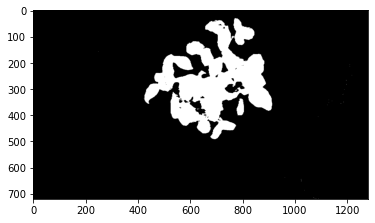

In [6]:
Plant1_top = cv2.cvtColor(Plant1_top, cv2.COLOR_BGR2RGB)
plt.imshow(Plant1_top)
plt.show()
# import image
Plant1_top = cv2.imread('../Images/Plant1_top_Color.png')

img_hsv = cv2.cvtColor(Plant1_top, cv2.COLOR_BGR2HSV)

hsv_color1 = np.asarray([0, 0, 0])   # white!
hsv_color2 = np.asarray([255, 255, 255])   # yellow! note the order

mask = cv2.inRange(img_hsv,(30, 70, 20), (80, 255, 255))

plt.imshow(mask, cmap='gray')   # this colormap will display in black / white
plt.show()


In [7]:
np.sum(mask)/255

95805.0

In [8]:
ndimage.center_of_mass(mask)

(268.9001617869631, 689.7002452899118)